# Previsão de renda
## Rodrigo Schulz

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos.

Este é um problema de concessão de cartões de crédito, publicado no Kaggle, uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction.

Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

Objetivos do negócio
Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.

Objetivos da modelagem
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.

Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.


## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 14 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.


### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência                                 |yyyy-mm-dd    |
| id_cliente              |  identificacao do cliente                           | inteiro      |
| sexo                    |  M = 'Masculino'; F = 'Feminino'                    | M/F          |
| posse_de_veiculo        |  Y = 'possui'; N = 'não possui'                     | Y/N          |
| posse_de_imovel         |  Y = 'possui'; N = 'não possui'                     | Y/N          |
| qtd_filhos              |  Quantidade de filhos                               | inteiro      |
| tipo_renda              |  Tipo de renda (ex: assaliariado, autônomo etc)     | texto        |
| educacao                |  Nível de educação (ex: secundário, superior etc)   | texto        |
| estado_civil            |  Estado civil (ex: solteiro, casado etc)            | texto        |
| tipo_residencia         |  tipo de residência (ex: casa/apartamento, etc)     | texto        |
| idade                   |  idade em anos                                      | decimal      |
| tempo_emprego           |  tempo de emprego em anos                           | inteiro      |
| qt_pessoas_residencia   |  quantidade de pessoas na residência                | inteiro      |
| renda                   |  valor em reais                                     | decimal      |





In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [42]:
df = pd.read_csv('./input/previsao_de_renda.csv')
df = df.drop('Unnamed: 0', axis='columns')

In [43]:
df.head(3)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89


In [44]:
df.info

<bound method DataFrame.info of          data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0      2015-01-01       15056    F             False             True   
1      2015-01-01        9968    M              True             True   
2      2015-01-01        4312    F              True             True   
3      2015-01-01       10639    F             False             True   
4      2015-01-01        7064    M              True            False   
...           ...         ...  ...               ...              ...   
14995  2016-03-01       16006    F             False             True   
14996  2016-03-01        3722    F             False             True   
14997  2016-03-01        6194    F              True             True   
14998  2016-03-01        4922    M              True            False   
14999  2016-03-01       14651    F             False             True   

       qtd_filhos        tipo_renda           educacao estado_civil  \
0               0   

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [45]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




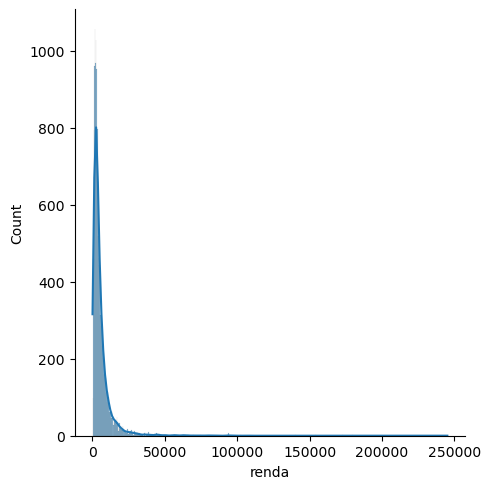

In [47]:
sns.displot(data=df, x="renda",kde=True)

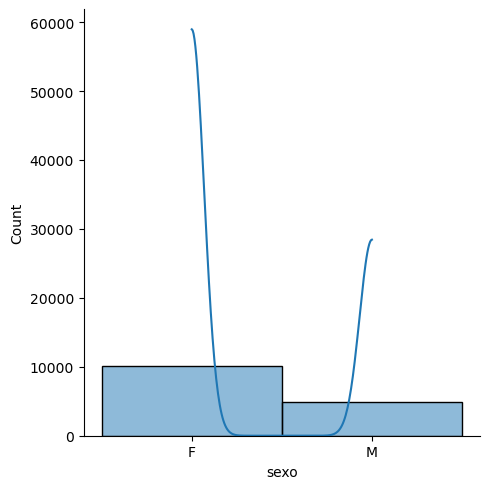

In [32]:
sns.displot(data=df, x="sexo",kde=True)

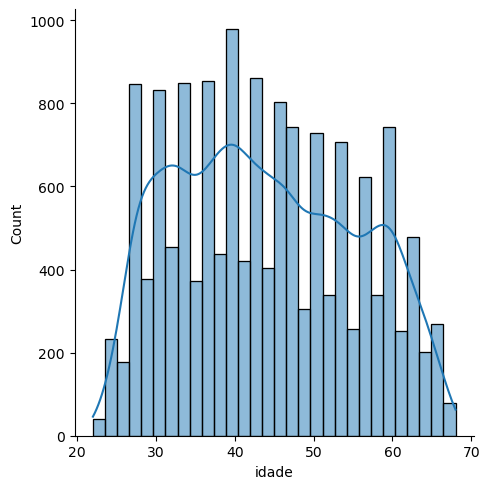

In [48]:
sns.displot(data=df, x="idade",kde=True)

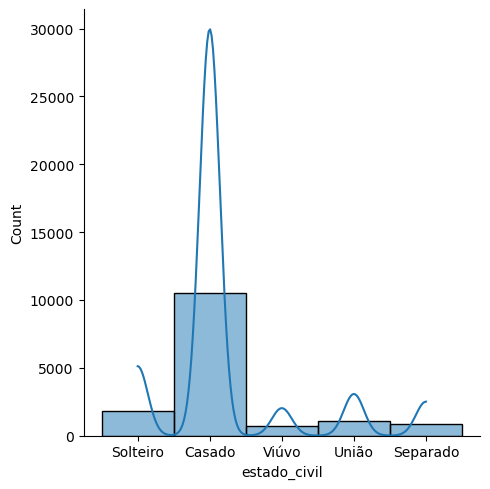

In [49]:
sns.displot(data=df, x="estado_civil",kde=True) 

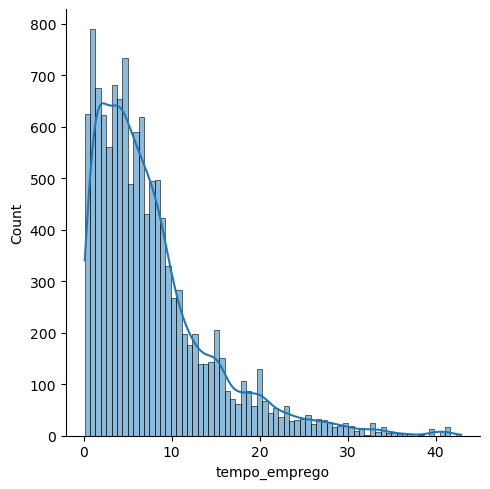

In [50]:
sns.displot(data=df, x="tempo_emprego",kde=True) 

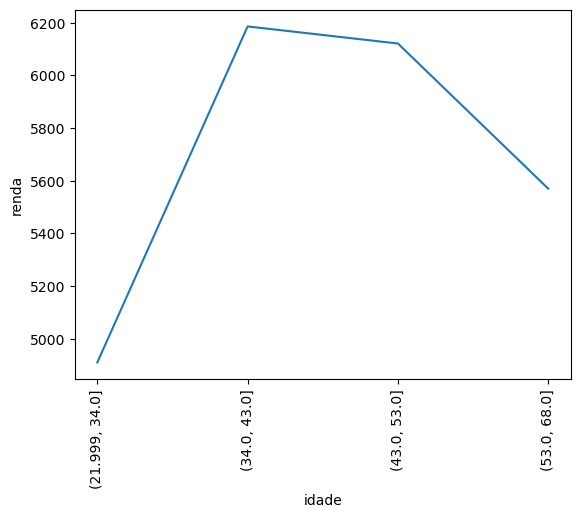

In [51]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['renda'].mean()

ax = biv.plot.line()
ax.set_ylabel("renda")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Nessa etapa realizamos tipicamente as seguintes operações com os dados:

seleção
Neste caso, os dados já estão pré-selecionados

limpeza
Precisaremos identificar e tratar dados faltantes

construção
Neste primeiro exercício não faremos construção de novas variáveis

integração
Temos apenas uma fonte de dados, não é necessário agregação

formatação
Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula


In [52]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
data_ref,object,15
id_cliente,int64,9845
sexo,object,2
posse_de_veiculo,bool,2
posse_de_imovel,bool,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6


In [53]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [54]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [74]:
df.isna().sum()

id_cliente                       0
posse_de_veiculo                 0
posse_de_imovel                  0
qtd_filhos                       0
idade                            0
tempo_emprego                    0
qt_pessoas_residencia            0
renda                            0
data_ref_2015-02-01              0
data_ref_2015-03-01              0
data_ref_2015-04-01              0
data_ref_2015-05-01              0
data_ref_2015-06-01              0
data_ref_2015-07-01              0
data_ref_2015-08-01              0
data_ref_2015-09-01              0
data_ref_2015-10-01              0
data_ref_2015-11-01              0
data_ref_2015-12-01              0
data_ref_2016-01-01              0
data_ref_2016-02-01              0
data_ref_2016-03-01              0
sexo_M                           0
tipo_renda_Bolsista              0
tipo_renda_Empresário            0
tipo_renda_Pensionista           0
tipo_renda_Servidor público      0
educacao_Primário                0
educacao_Pós graduaç

In [72]:
df = df.dropna ()
df

,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,data_ref_2015-02-01,data_ref_2015-03-01,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,15056,False,True,0,26,6.602740,1.0,8060.34,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9968,True,True,0,28,7.183562,2.0,1852.15,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4312,True,True,0,35,0.838356,2.0,2253.89,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10639,False,True,1,30,4.846575,3.0,6600.77,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7064,True,False,0,33,4.293151,1.0,6475.97,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,11477,True,False,0,32,9.849315,2.0,1592.57,0,0,...,1,0,0,0,0,0,0,0,0,0
14995,16006,False,True,0,48,13.887671,1.0,7990.58,0,0,...,0,0,1,0,0,0,0,0,0,0
14997,6194,True,True,0,45,7.832877,2.0,604.82,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,4922,True,False,0,36,4.298630,2.0,3352.27,0,0,...,0,0,0,0,0,0,0,0,0,0


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:

Selecionar a técnica de modelagem
Utilizaremos a técnica de floresta aleatória (random forest), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.

Desenho do teste
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada treinamento, onde o algoritmo 'aprende', e outra chamada teste, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.

Avaliação do modelo
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (AtrasoRelevante2anos). Esse percentual de acerto é frequentemente chamado de acurácia (obs: nunca usar assertividade... assertivo não é aquele que acerta, e sim "adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo." aCertivo está errado ;)

In [75]:
y = df[['renda']]
y

,renda
0,8060.34
1,1852.15
2,2253.89
3,6600.77
4,6475.97
...,...
14994,1592.57
14995,7990.58
14997,604.82
14998,3352.27


In [76]:
X = df.drop('renda', axis='columns')
X

,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,data_ref_2015-02-01,data_ref_2015-03-01,data_ref_2015-04-01,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,15056,False,True,0,26,6.602740,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9968,True,True,0,28,7.183562,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4312,True,True,0,35,0.838356,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10639,False,True,1,30,4.846575,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7064,True,False,0,33,4.293151,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,11477,True,False,0,32,9.849315,2.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14995,16006,False,True,0,48,13.887671,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14997,6194,True,True,0,45,7.832877,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,4922,True,False,0,36,4.298630,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
[X_train, X_test, y_train, y_test] = train_test_split(X,y)

In [78]:
X_train

,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,data_ref_2015-02-01,data_ref_2015-03-01,data_ref_2015-04-01,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
6113,16030,True,True,2,40,0.627397,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8012,15223,True,True,0,43,3.117808,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1943,4880,True,True,1,42,3.635616,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6090,5710,True,False,0,61,5.956164,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8204,8380,False,True,0,27,1.468493,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,11230,False,False,0,48,23.361644,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5070,13578,True,False,0,33,3.846575,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4565,476,True,True,1,34,15.786301,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13086,9386,False,False,0,51,4.016438,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [80]:
y_train

,renda
6113,6202.58
8012,1696.20
1943,49638.40
6090,11816.81
8204,5213.88
...,...
8659,25857.60
5070,1657.39
4565,2483.41
13086,4215.44


### Rodando o modelo


A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro n_estimator define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.

In [84]:
regr_1=DecisionTreeRegressor(max_depth=2)
regr_2=DecisionTreeRegressor(max_depth=8)


regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

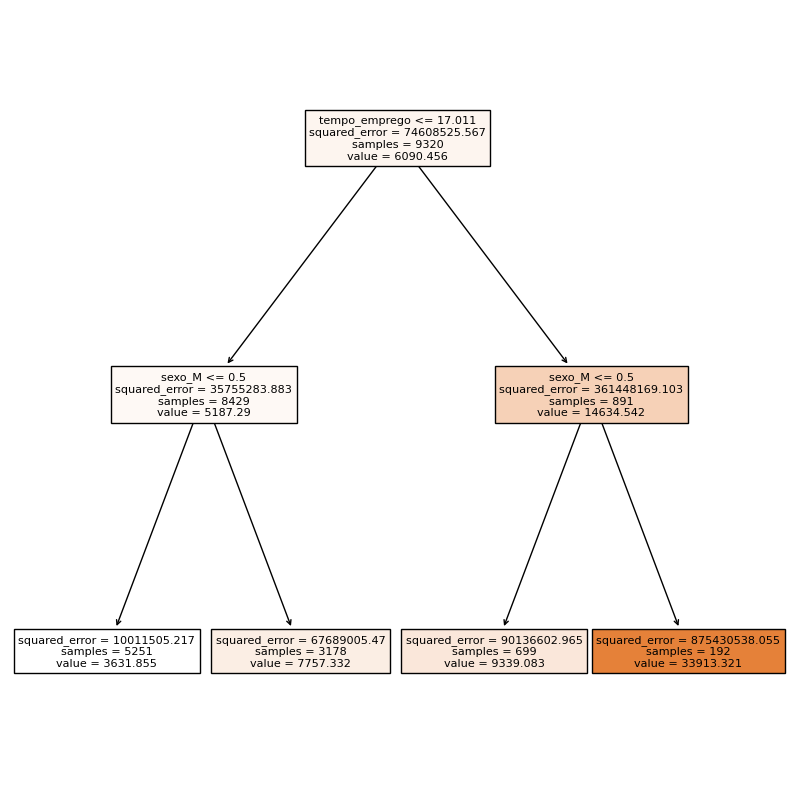

In [85]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True) 

In [86]:
# mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,28
O MSE da árvore com profundidade=8 é: 0,70


In [87]:
# O primeiro modelo por apresentar um menor MSE é um melhor modelo, tem menos erros.

regr_1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

regr_1.fit(X_train, y_train)

mse1 = regr_1.score(X_test, y_test)
mse1

0.39005419047416157

## Etapa 5 Crisp-DM: Avaliação dos resultados


n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.248649,0.248649,0.248649,0.248649,0.248649,0.248649,0.248649,0.248649
3,0.390054,0.390054,0.390054,0.390054,0.390054,0.390054,0.390054,0.390054
4,0.392765,0.429349,0.434477,0.434477,0.436798,0.438152,0.442048,0.439832
5,0.368358,0.446248,0.450656,0.428756,0.431594,0.433453,0.445614,0.442379
6,0.317571,0.432621,0.442563,0.429067,0.446042,0.440187,0.437828,0.426029
7,0.316909,0.416724,0.423869,0.416377,0.435485,0.428158,0.427379,0.418878
8,0.316997,0.385912,0.390869,0.400086,0.424047,0.414089,0.416370,0.428516


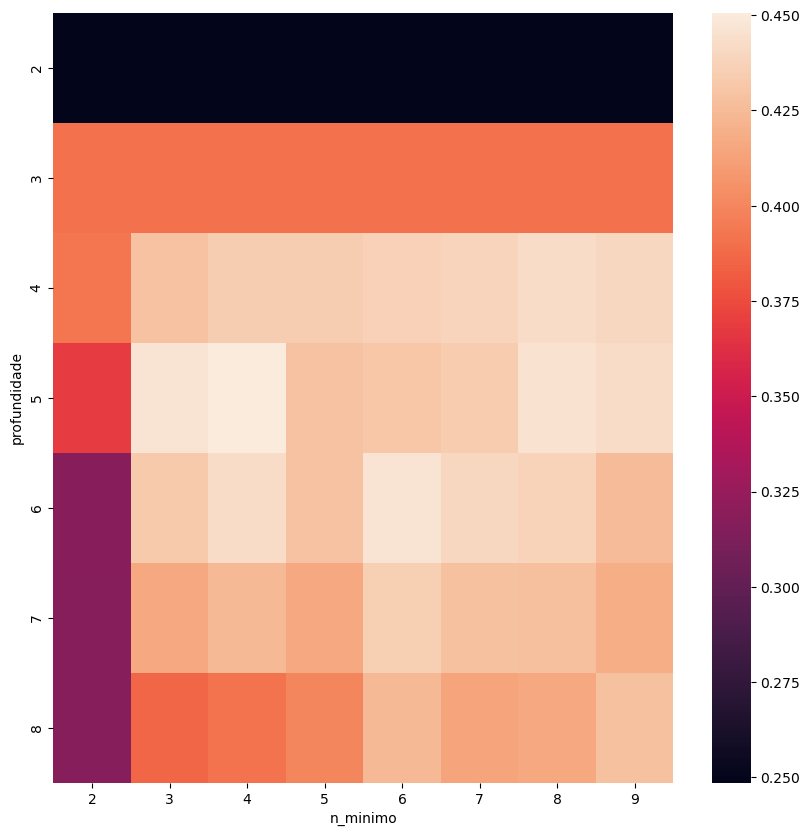

In [88]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [90]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 8.18604563e-10, 5.44183906e+00, 1.22287154e+01,
        1.22838959e+01, 1.15977012e+02, 1.67440302e+02, 2.33842842e+02,
        5.39956255e+02, 6.39830202e+02, 8.50716703e+02, 9.50323278e+02,
        9.65331685e+02, 1.04319345e+03, 1.65957059e+03, 2.00046781e+03,
        2.69598446e+03, 2.80985203e+03, 3.10036288e+03, 3.13252547e+03,
        3.16015655e+03, 4.07480316e+03, 4.24643122e+03, 4.57920273e+03,
        5.06795796e+03, 5.44512667e+03, 5.53903693e+03, 5.53909982e+03,
        5.91673621e+03, 6.00462931e+03, 6.42177995e+03, 6.77553812e+03,
        6.83032854e+03, 7.03258440e+03, 7.25314040e+03, 7.32624487e+03,
        8.24568906e+03, 9.18642356e+03, 9.68440066e+03, 1.07184940e+04,
        1.09422142e+04, 1.15631786e+04, 1.24747334e+04, 1.31994702e+04,
        1.37940168e+04, 1.49462676e+04, 1.55972576e+04, 1.63014869e+04,
        1.63536347e+04, 1.66444563e+04, 1.72005052e+04, 1.74278493e+04,
        1.77661961e+04, 1.95720683e+04, 1.97143639

Text(0, 0.5, 'Impureza total das folhas')

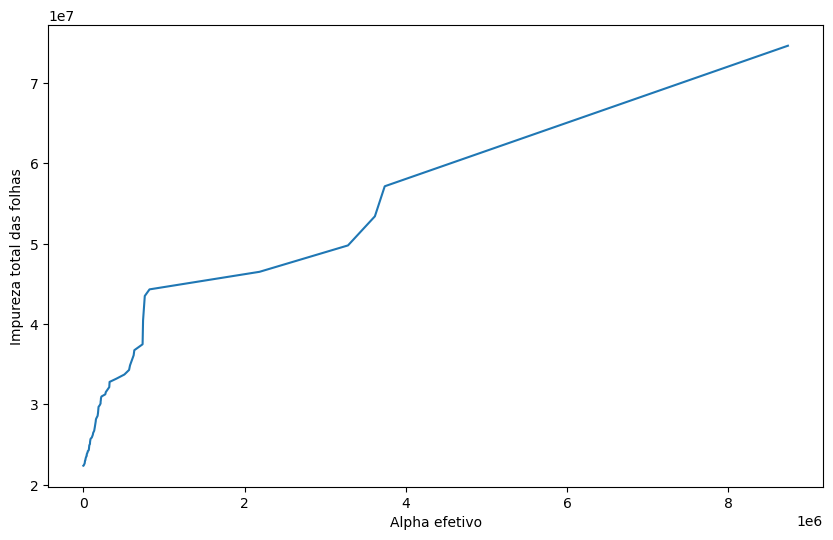

In [91]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.